# Analysis of Sheltered vs Unsheltered Data and Types of Temporary Housing numbers

In [3]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
#Define path to CSV data file 
# Read in CSV file
sheltered_status_data = pd.read_csv("HUD_PIP_Data.csv")
sheltered_status_data.head()

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered TH Homeless Individuals,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK,2.0,1642.0,898.0,489.0,1387.0,255.0,1062.0,618.0,273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,8.0,5452.0,1452.0,2344.0,3796.0,1656.0,4184.0,1210.0,1613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,9.0,3836.0,1251.0,1034.0,2285.0,1551.0,2987.0,985.0,781.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS,0.0,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,3.0,14646.0,3934.0,4684.0,8618.0,6028.0,10020.0,2412.0,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sheltered_status_data.columns

Index(['State', 'Number of CoCs', 'Overall Homeless', 'Sheltered ES Homeless',
       'Sheltered TH Homeless', 'Sheltered Total Homeless',
       'Unsheltered Homeless', 'Overall Homeless Individuals',
       'Sheltered ES Homeless Individuals',
       'Sheltered TH Homeless Individuals',
       ...
       'Sheltered Total Homeless People in Families - Age 25 to 34',
       'Sheltered Total Homeless People in Families - Age 35 to 44',
       'Sheltered Total Homeless People in Families - Age 45 to 54',
       'Sheltered Total Homeless People in Families - Age 55 to 64',
       'Sheltered Total Homeless People in Families - Over 64',
       'Unsheltered Homeless People in Families - Age 25 to 34',
       'Unsheltered Homeless People in Families - Age 35 to 44',
       'Unsheltered Homeless People in Families - Age 45 to 54',
       'Unsheltered Homeless People in Families - Age 55 to 64',
       'Unsheltered Homeless People in Families - Over 64'],
      dtype='object', length=661)

In [6]:
# Create a new table/dataframe that focuses on sheltered status (temp. housing vs. no housing) for only 2015-2023
sheltered_status_focused = sheltered_status_data[(sheltered_status_data['Year'] >= 2015) & (sheltered_status_data['Year'] <= 2023)]
sheltered_status_focused.head()

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered TH Homeless Individuals,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
464,AK,2.0,1956.0,1127.0,512.0,1639.0,317.0,1342.0,792.0,292.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,AL,8.0,3970.0,1574.0,1349.0,2943.0,1027.0,2868.0,1146.0,910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,AR,7.0,2560.0,1161.0,515.0,1678.0,882.0,1833.0,722.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,AS,0.0,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,AZ,3.0,9896.0,3395.0,3504.0,6939.0,2957.0,6548.0,2147.0,1637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Create a new DataFrame with only totals of Overall, Sheltered, Unsheltered 
homeless_overall_totals = sheltered_status_focused[['State', 'Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless']]
homeless_overall_totals.set_index('State', inplace=True)
homeless_overall_totals

,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless
State,,,
AK,1956.0,1639.0,317.0
AL,3970.0,2943.0,1027.0
AR,2560.0,1678.0,882.0
AS,,,
AZ,9896.0,6939.0,2957.0
...,...,...,...
WV,1416.0,960.0,456.0
WY,532.0,474.0,58.0
Total,653104.0,396494.0,256610.0


In [8]:
states_to_include = ['HI','UT','CO','MA','CA','LA','ND','MS','IL','NM','AZ']

# Create a new DataFrame containing only the specified states
state_specific_totals = homeless_overall_totals.loc[states_to_include]

# Display the filtered DataFrame
print(state_specific_totals)

      Overall Homeless Sheltered Total Homeless Unsheltered Homeless
State                                                               
HI              7620.0                   3777.0               3843.0
HI              7921.0                   3613.0               4308.0
HI              7220.0                   3420.0               3800.0
HI              6530.0                   3055.0               3475.0
HI              6412.0                   2772.0               3640.0
...                ...                      ...                  ...
AZ             10007.0                   5475.0               4532.0
AZ             10979.0                   5458.0               5521.0
AZ              5460.0                   5460.0                  0.0
AZ             13553.0                   5526.0               8027.0
AZ             14237.0                   6622.0               7615.0

[99 rows x 3 columns]


In [9]:
state_specific_totals.dtypes

Overall Homeless            object
Sheltered Total Homeless    object
Unsheltered Homeless        object
dtype: object

In [10]:
#Removed any missing data or invalid data to clean up the data
state_specific_totals.dropna()

,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless
State,,,
HI,7620.0,3777.0,3843.0
HI,7921.0,3613.0,4308.0
HI,7220.0,3420.0,3800.0
HI,6530.0,3055.0,3475.0
HI,6412.0,2772.0,3640.0
...,...,...,...
AZ,10007.0,5475.0,4532.0
AZ,10979.0,5458.0,5521.0
AZ,5460.0,5460.0,0.0


In [11]:
#Converted data to numerical values to plot
state_specific_totals['Overall Homeless'] = pd.to_numeric(state_specific_totals['Overall Homeless'], errors='coerce')
state_specific_totals['Sheltered Total Homeless'] = pd.to_numeric(state_specific_totals['Sheltered Total Homeless'], errors='coerce')
state_specific_totals['Unsheltered Homeless'] = pd.to_numeric(state_specific_totals['Unsheltered Homeless'], errors='coerce')

In [12]:
# Calculate the total sum for the selected states within the timeframe

total_by_state = state_specific_totals.groupby('State').sum()


total_by_state

,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless
State,,,
AZ,92651.0,53523.0,39128.0
CA,1218598.0,421025.0,797573.0
CO,95145.0,67669.0,27476.0
HI,56841.0,26475.0,30366.0
IL,95955.0,78476.0,17479.0
LA,33226.0,23575.0,9651.0
MA,164549.0,155465.0,9084.0
MS,11640.0,6125.0,5515.0
ND,6899.0,5439.0,1460.0


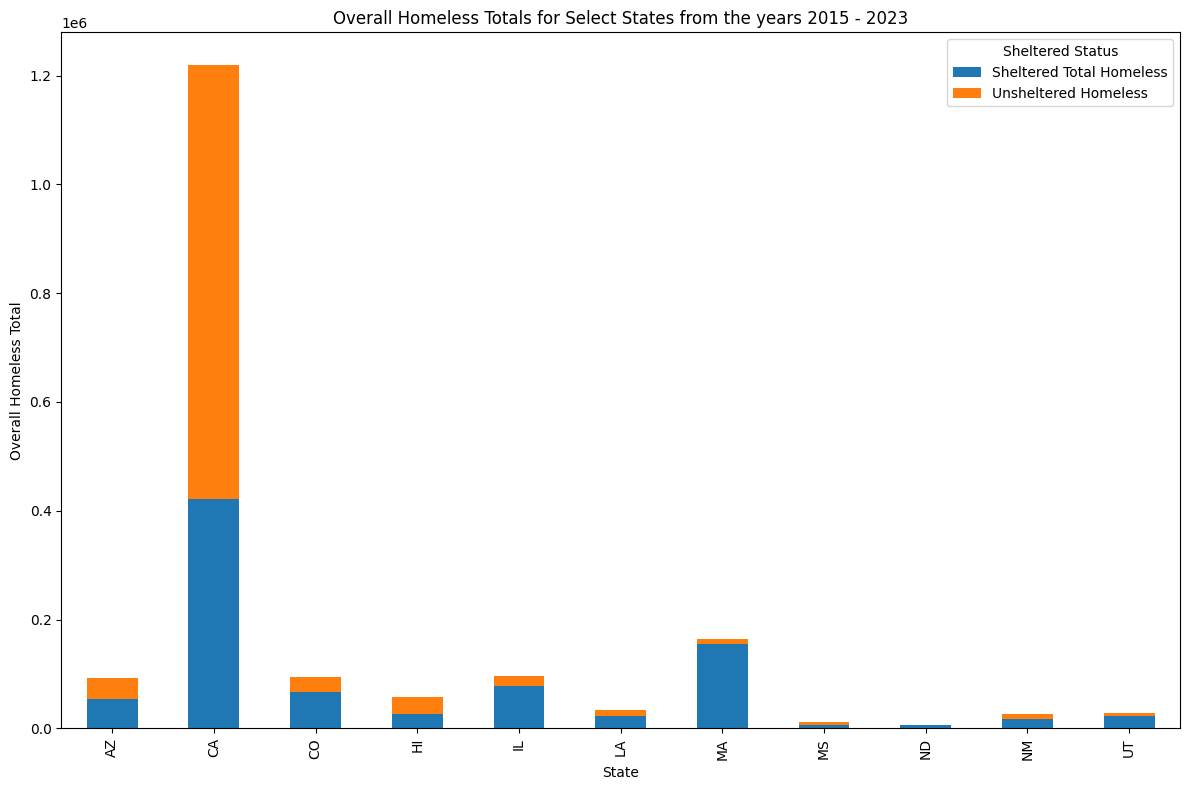

In [13]:
# Plot the totals for each selected state from 2015 - 2023"
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
total_by_state[['Sheltered Total Homeless', 'Unsheltered Homeless']].plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding labels and title
plt.title('Overall Homeless Totals for Select States from the years 2015 - 2023')
plt.xlabel('State')
plt.ylabel('Overall Homeless Total')
plt.legend(title='Sheltered Status')
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Calculate the median amounts for the selected states within the timeframe

avg_total_by_state = state_specific_totals.groupby('State').median()

avg_total_by_state

,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless
State,,,
AZ,9896.0,5781.0,4066.0
CA,131532.0,42846.0,89543.0
CO,10397.0,7241.0,2939.0
HI,6458.0,2808.0,3743.0
IL,10643.0,8541.0,1901.0
LA,3173.0,2020.0,1141.0
MA,18471.0,17642.0,991.0
MS,1196.0,698.0,621.0
ND,610.0,545.0,83.0


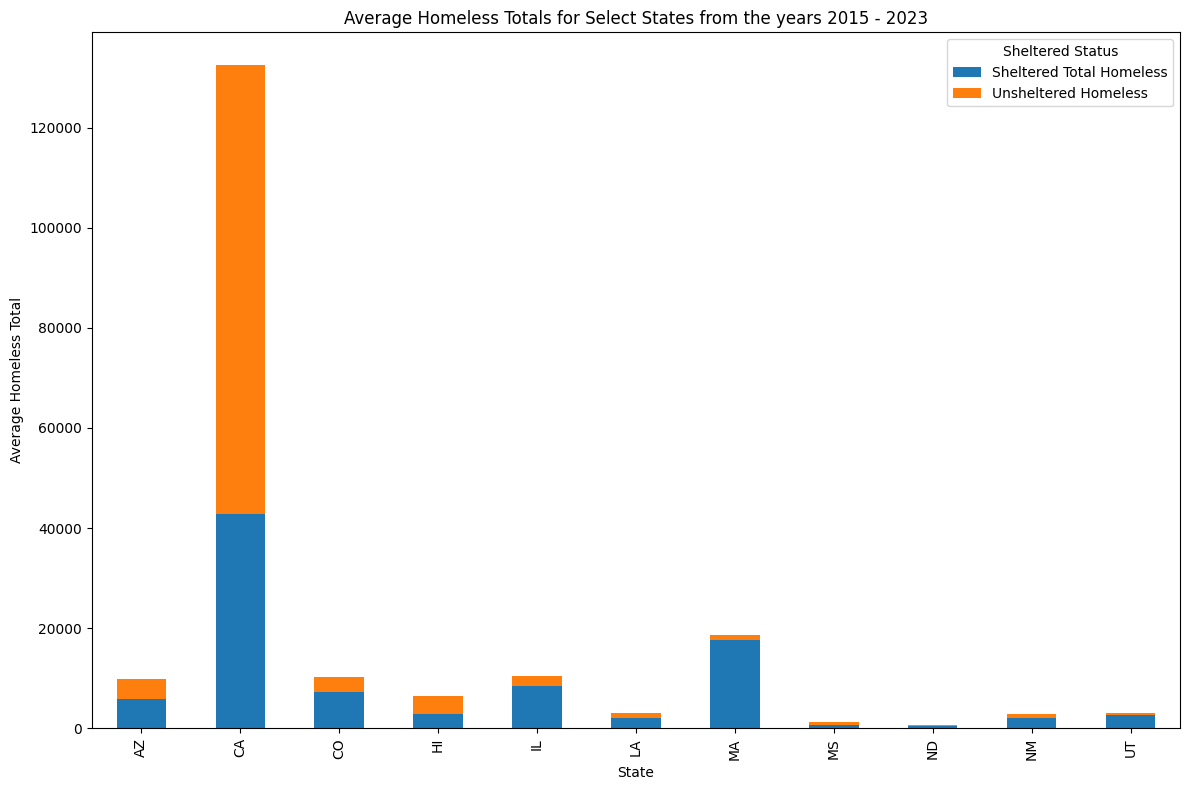

In [15]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
avg_total_by_state[['Sheltered Total Homeless', 'Unsheltered Homeless']].plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding labels and title
plt.title('Average Homeless Totals for Select States from the years 2015 - 2023')
plt.xlabel('State')
plt.ylabel('Average Homeless Total')
plt.legend(title='Sheltered Status')
plt.tight_layout()
# Show the plot
plt.show()

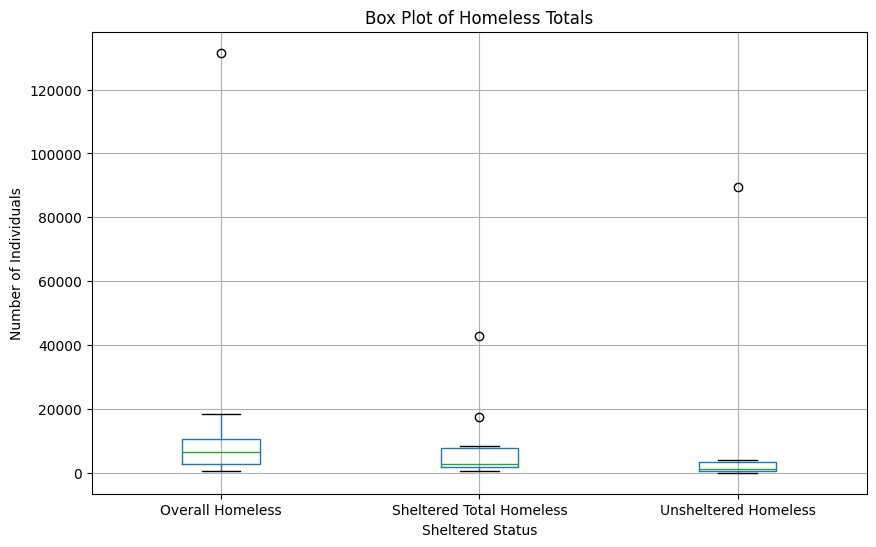

In [16]:
# Create a Box Plot to show any outliers in the data 

# Plot box plot
avg_total_by_state.boxplot(column=['Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless'], figsize=(10, 6))

# Adding labels and title
plt.title('Box Plot of Homeless Totals')
plt.ylabel('Number of Individuals')
plt.xlabel('Sheltered Status')

# Show the plot
plt.show()

In [17]:
# Create a new DataFrame that breaksdown the totals of types of temporary housing Sheltered Breakdown (Emergency Shelter, Transitional Housing, Safe Haven)
sheltered_overall_totals = sheltered_status_focused[['State', 'Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']]
sheltered_overall_totals.set_index('State', inplace=True)
sheltered_overall_totals

,Sheltered Total Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless
State,,,,
AK,1639.0,1127.0,512.0,0.0
AL,2943.0,1574.0,1349.0,20.0
AR,1678.0,1161.0,515.0,2.0
AS,,,,
AZ,6939.0,3395.0,3504.0,40.0
...,...,...,...,...
WV,960.0,830.0,124.0,6.0
WY,474.0,343.0,131.0,0.0
Total,396494.0,328945.0,65521.0,2028.0


In [18]:
# Filter data by specific dates
states_to_include = ['HI','UT','CO','MA','CA','LA','ND','MS','IL','NM','AZ']

# Create a new DataFrame containing only the specified states
sheltered_state_specific_totals = sheltered_overall_totals.loc[states_to_include]

# Display the filtered DataFrame
print(sheltered_state_specific_totals)

      Sheltered Total Homeless Sheltered ES Homeless Sheltered TH Homeless  \
State                                                                        
HI                      3777.0                1257.0                2494.0   
HI                      3613.0                1226.0                2361.0   
HI                      3420.0                1341.0                2054.0   
HI                      3055.0                1528.0                1527.0   
HI                      2772.0                1587.0                1185.0   
...                        ...                   ...                   ...   
AZ                      5475.0                3437.0                1978.0   
AZ                      5458.0                3483.0                1914.0   
AZ                      5460.0                3822.0                1569.0   
AZ                      5526.0                3909.0                1546.0   
AZ                      6622.0                5104.0            

In [19]:
sheltered_state_specific_totals.dropna()

,Sheltered Total Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless
State,,,,
HI,3777.0,1257.0,2494.0,26.0
HI,3613.0,1226.0,2361.0,26.0
HI,3420.0,1341.0,2054.0,25.0
HI,3055.0,1528.0,1527.0,0.0
HI,2772.0,1587.0,1185.0,0.0
...,...,...,...,...
AZ,5475.0,3437.0,1978.0,60.0
AZ,5458.0,3483.0,1914.0,61.0
AZ,5460.0,3822.0,1569.0,69.0


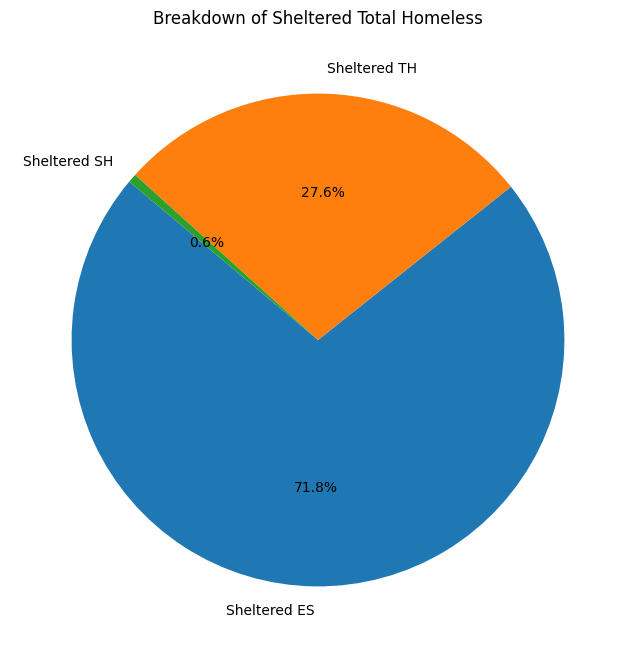

In [20]:
# Convert columns to numeric types
sheltered_state_specific_totals['Sheltered ES Homeless'] = pd.to_numeric(sheltered_state_specific_totals['Sheltered ES Homeless'], errors='coerce')
sheltered_state_specific_totals['Sheltered TH Homeless'] = pd.to_numeric(sheltered_state_specific_totals['Sheltered TH Homeless'], errors='coerce')
sheltered_state_specific_totals['Sheltered SH Homeless'] = pd.to_numeric(sheltered_state_specific_totals['Sheltered SH Homeless'], errors='coerce')

# Calculate proportions
sheltered_es = sheltered_state_specific_totals['Sheltered ES Homeless'].sum()
sheltered_th = sheltered_state_specific_totals['Sheltered TH Homeless'].sum()
sheltered_sh = sheltered_state_specific_totals['Sheltered SH Homeless'].sum()

# Create a dictionary with category names and corresponding counts
sheltered_counts = {'Sheltered ES': sheltered_es,
                    'Sheltered TH': sheltered_th,
                    'Sheltered SH': sheltered_sh}

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sheltered_counts.values(), labels=sheltered_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Sheltered Total Homeless')
plt.show()

In [21]:
# Breakdown sheletered data to show breakdown totals for each State

# List of states
states = sheltered_state_specific_totals.index.unique()
states

Index(['HI', 'UT', 'CO', 'MA', 'CA', 'LA', 'ND', 'MS', 'IL', 'NM', 'AZ'], dtype='object', name='State')

In [22]:
# Loop through each state
for state in states:
    # Get the data for the current state
    state_data = sheltered_state_specific_totals.loc()[states]

    # Extract counts for each category
    sheltered_es = state_data['Sheltered ES Homeless']
    sheltered_th = state_data['Sheltered TH Homeless']
    sheltered_sh = state_data['Sheltered SH Homeless']

state_data    

,Sheltered Total Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless
State,,,,
HI,3777.0,1257.0,2494.0,26.0
HI,3613.0,1226.0,2361.0,26.0
HI,3420.0,1341.0,2054.0,25.0
HI,3055.0,1528.0,1527.0,0.0
HI,2772.0,1587.0,1185.0,0.0
...,...,...,...,...
AZ,5475.0,3437.0,1978.0,60.0
AZ,5458.0,3483.0,1914.0,61.0
AZ,5460.0,3822.0,1569.0,69.0


In [23]:
# Group by 'State' and calculate the total sheltered for each state
total_sheltered_by_state = state_data.groupby('State').sum()

# Calculate the total sheltered for each state
total_sheltered_by_state['Total Sheltered'] = total_sheltered_by_state['Sheltered ES Homeless'] + \
                                              total_sheltered_by_state['Sheltered TH Homeless'] + \
                                              total_sheltered_by_state['Sheltered SH Homeless']
total_sheltered_by_state

,Sheltered Total Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Total Sheltered
State,,,,,
AZ,6939.06463.05781.05799.05475.05458.05460.05526...,34307.0,18735.0,481.0,53523.0
CA,42039.039752.042636.040429.042846.047888.05142...,296860.0,121945.0,2220.0,421025.0
CO,7134.07611.07081.06528.07431.06933.08016.07241...,44036.0,23325.0,308.0,67669.0
HI,3777.03613.03420.03055.02772.02808.02490.02224...,13491.0,12757.0,227.0,26475.0
IL,10463.09736.08541.08701.08310.08153.06933.0731...,49357.0,28453.0,666.0,78476.0
LA,2890.02853.02330.01994.01967.02020.01613.06138...,16214.0,6987.0,374.0,23575.0
MA,20542.018848.016574.019083.017642.016681.01394...,136619.0,18199.0,647.0,155465.0
MS,1141.0889.0753.0731.0698.0581.0359.0435.0538.0,3555.0,2570.0,0.0,6125.0
ND,819.0707.0758.0494.0545.0507.0474.0527.0608.0,4061.0,1284.0,94.0,5439.0


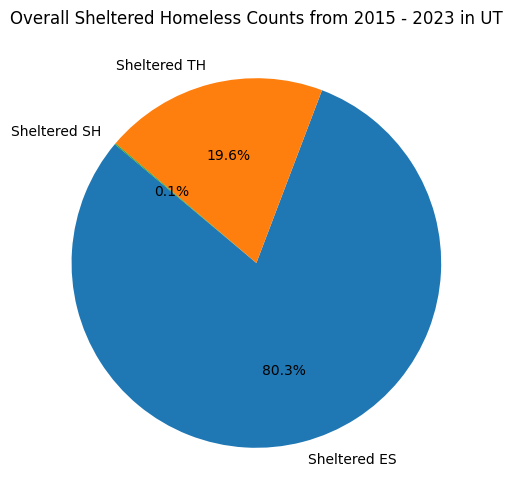

In [24]:
# Iterate over each row
for index, row in total_sheltered_by_state.iterrows():
    
    # Extract state and sheltered counts
    state = index
    sheltered_es = row['Sheltered ES Homeless']
    sheltered_th = row['Sheltered TH Homeless']
    sheltered_sh = row['Sheltered SH Homeless']

# Calculate total sheltered
total_sheltered = sheltered_es + sheltered_th + sheltered_sh

# Plot pie chart for the current state
labels = ['Sheltered ES', 'Sheltered TH', 'Sheltered SH']
sizes = [sheltered_es, sheltered_th, sheltered_sh]

plt.figure(figsize=(6, 6))
plt.pie(x=sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Overall Sheltered Homeless Counts from 2015 - 2023 in {state}')
plt.show()

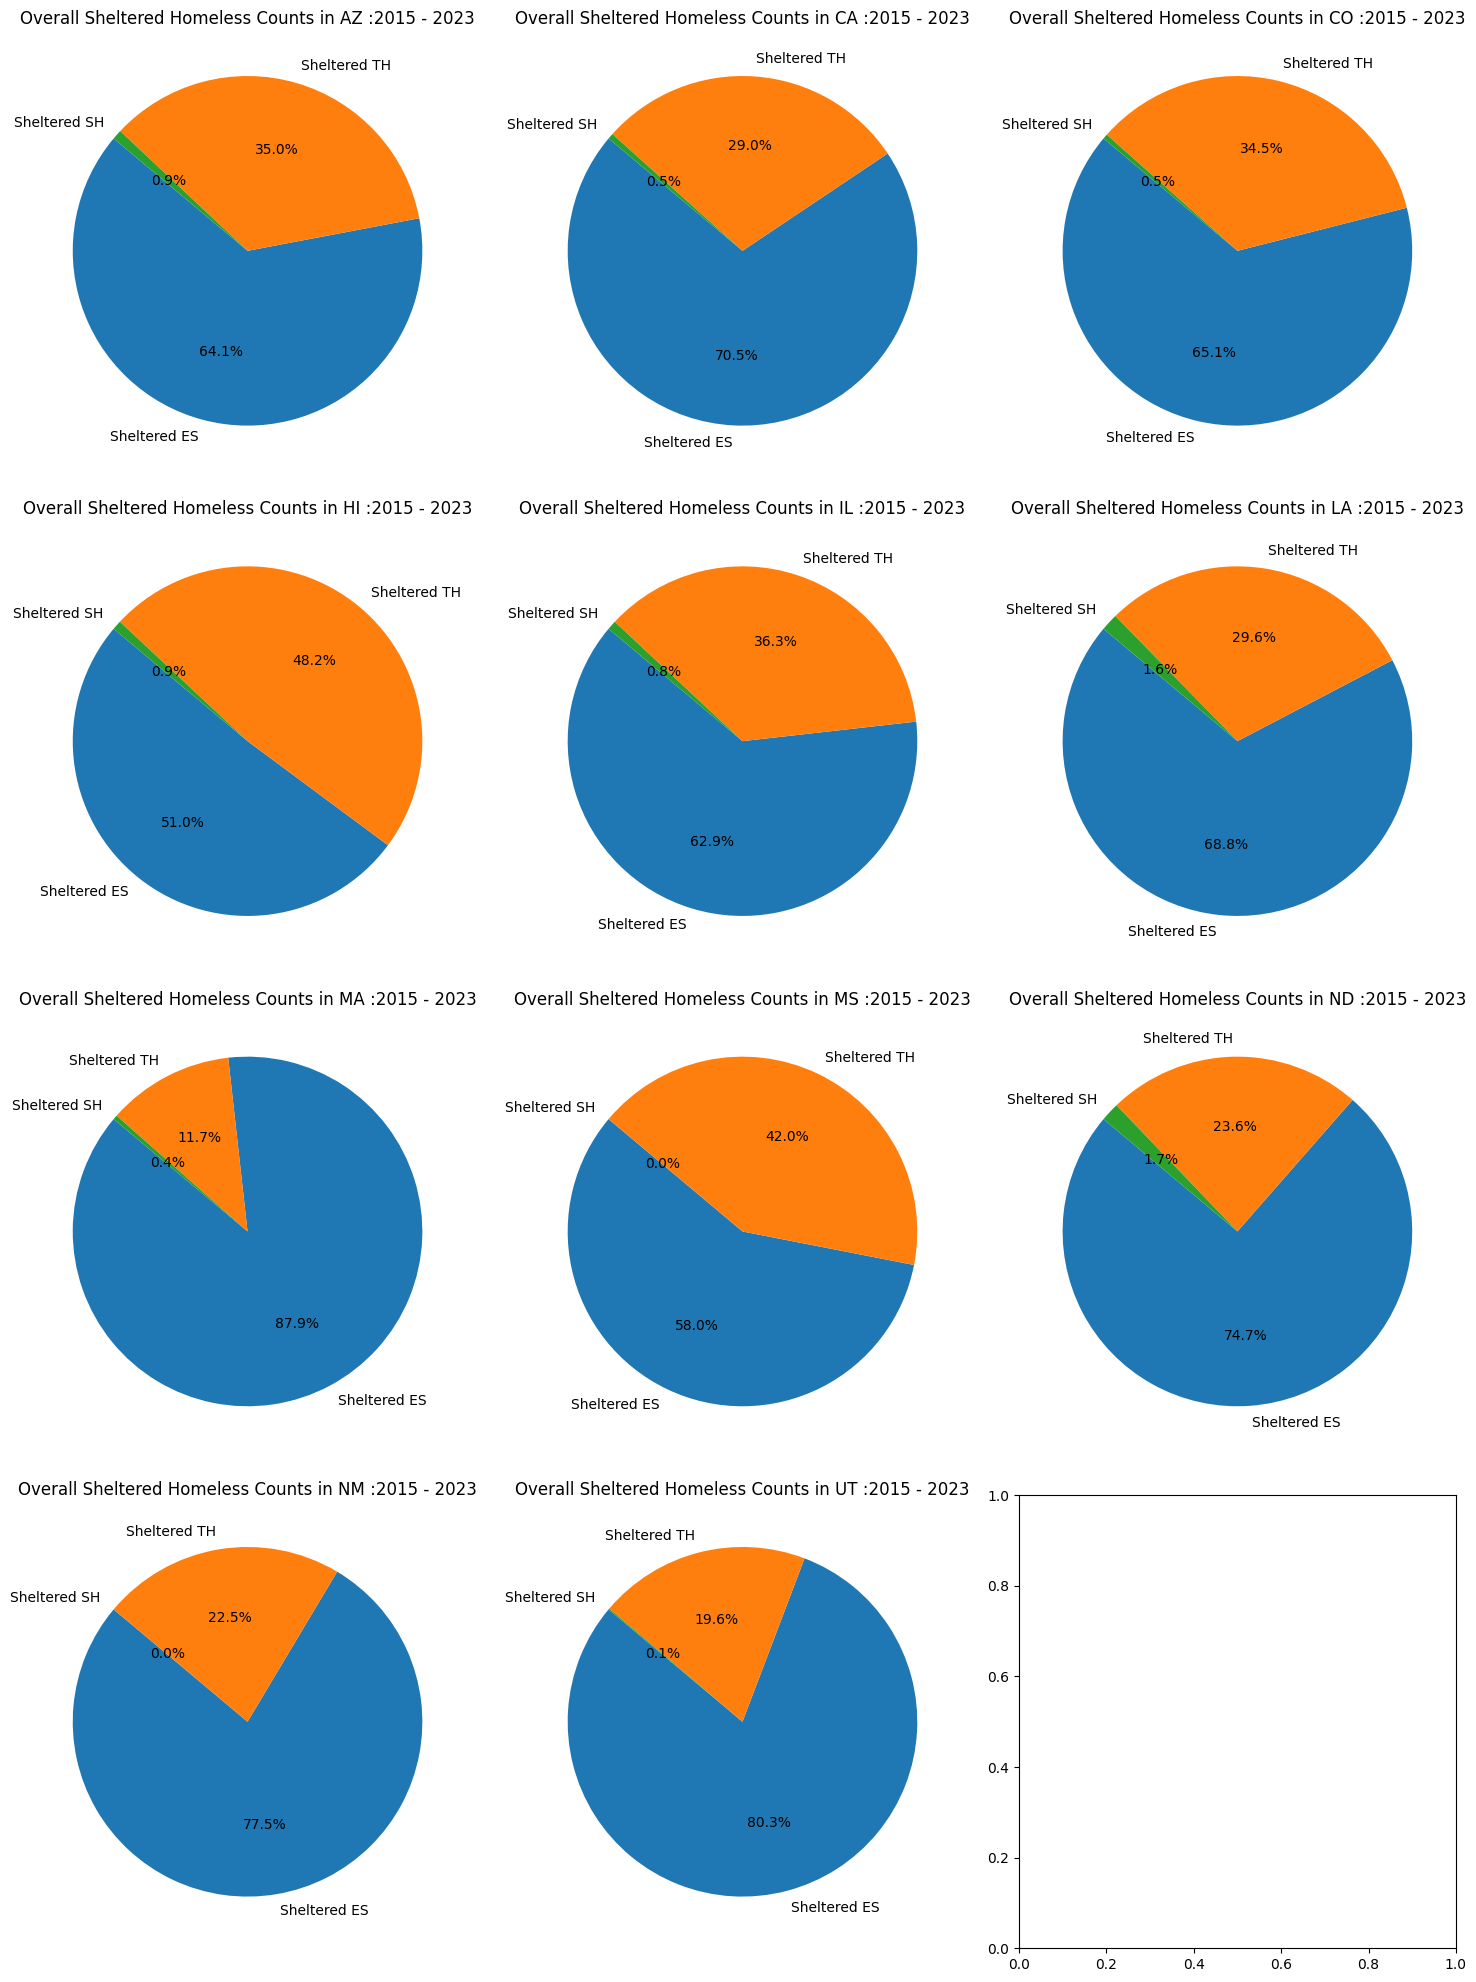

In [25]:
# List of selected states
selected_states = ['AZ', 'CA', 'CO', 'HI', 'IL', 'LA', 'MA', 'MS', 'ND', 'NM', 'UT']

# Create subplots
num_states = len(selected_states)
num_cols = 3
num_rows = (num_states + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=100)

# Flatten axes if needed
if num_rows == 1:
    axes = [axes]

# Iterate over selected states
for ax, state in zip(axes.flat, selected_states):
    # Get the data for the current state
    state_data = total_sheltered_by_state.loc[state]

    # Extract sheltered counts
    sheltered_es = state_data['Sheltered ES Homeless']
    sheltered_th = state_data['Sheltered TH Homeless']
    sheltered_sh = state_data['Sheltered SH Homeless']

    # Calculate total sheltered
    total_sheltered = sheltered_es + sheltered_th + sheltered_sh

       # Plot pie chart for the current state
    labels = ['Sheltered ES', 'Sheltered TH', 'Sheltered SH']
    sizes = [sheltered_es, sheltered_th, sheltered_sh]
    
    ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Overall Sheltered Homeless Counts in {state} :2015 - 2023')

plt.tight_layout()
plt.show()